<a href="https://colab.research.google.com/github/Jojo31100/Projet_7-Air_Paradis-PUBLIC/blob/main/AirParadis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet n°7 - Air Paradis : réalisez une analyse de sentiments grâce au Deep Learning**

[Lien vers le projet et les attendus](https://openclassrooms.com/fr/paths/795/projects/1516/)

**Comment allez-vous procéder ?**

Cette mission suit un scénario de projet professionnel.

Vous pouvez suivre les étapes pour vous aider à réaliser vos livrables.

Avant de démarrer, nous vous conseillons de :

- lire toute la mission et ses documents liés ;
- prendre des notes sur ce que vous avez compris ;
- consulter les étapes pour vous guider ;
- préparer une liste de questions pour votre première session de mentorat.

---

**Prêt à mener la mission ?**

Vous êtes ingénieur IA chez MIC (Marketing Intelligence Consulting), une entreprise de conseil spécialisée sur les problématiques de marketing digital.

Dans deux semaines, vous avez rendez-vous avec Mme Aline, directrice marketing de la compagnie aérienne “Air Paradis”.

Air Paradis a missionné votre cabinet pour créer un produit IA permettant d'anticiper les bad buzz sur les réseaux sociaux.

Il est vrai que “Air Paradis” n'a pas toujours bonne presse sur les réseaux...

En sortant d'un rendez-vous de cadrage avec les équipes de Air Paradis, vous avez noté les éléments suivants :

- Air Paradis veut un prototype d'un produit IA permettant de prédire le sentiment associé à un tweet.

- Données : pas de données clients chez Air Paradis. Solution : utiliser des [données Open Source](https://www.kaggle.com/kazanova/sentiment140) - ou en téléchargement direct à [ce lien](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+7%C2%A0-+D%C3%A9tectez+les+Bad+Buzz+gr%C3%A2ce+au+Deep+Learning/sentiment140.zip)
 - Description des données : des informations sur les tweets (utilisateur ayant posté, contenu, moment du post) et un label binaire (tweet exprimant un sentiment négatif ou non).

- TO-DO :
 - Préparer un prototype fonctionnel du modèle. Le modèle est exposé via une API déployée sur le Cloud, appelée par une interface locale(notebook ou application Streamlit) qui envoie un tweet à l'API et récupère la prédiction de sentiment.
 - Préparer un support de présentation explicitant les méthodologies utilisées pour les différentes approches (attention : audience non technique).

---

Après avoir reçu votre compte-rendu, Marc, votre manager, vous a contacté pour, selon ses mots, “faire d'une pierre deux coups”.

**De :** *Marc*

**Envoyé :** *hier 17:14*

**À :** *vous*

**Objet :** *Air Paradis : complément*

Salut

Merci pour ton récap du meeting avec Air Paradis. J'ai l'impression que ça s'est bien passé !

Je me disais... Puisque tu vas faire un proto pour ce client, j'ai l'intuition que ce produit pourrait se généraliser à d'autres cas d'usage.

Tu voudrais bien en profiter pour tester plusieurs approches ?

- approche “Modèle sur mesure simple”, pour développer rapidement un modèle classique (ex : régression logistique) permettant de prédire le sentiment associé à un tweet.
- approche “Modèle sur mesure avancé” pour développer un modèle basé sur des réseaux de neurones profonds pour prédire le sentiment associé à un tweet. => C'est ce modèle que tu devras déployer et montrer à Air Paradis.

Pour cette 2ème approche, tu penseras bien à essayer au moins deux word embeddings différents et à garder celui qui permet d'obtenir les meilleures performances. En complément, pourrais-tu également regarder l'apport en performance d'un modèle BERT ? Cela nous permettra de voir si nous devons investir dans ce type de modèle.

Et en même ce serait top si tu pouvais mettre en oeuvre un bon exemple de démarche orientée MLOps, tu sais c'est la nouvelle priorité de notre directeur !

J'aimerais que tu puisses démontrer à l'occasion de l'élaboration de ton prototype tout l'apport du MLOps, afin d'assurer une diffusion aux autres équipes :

- d'abord réaliser une présentation synthétique des principes du MLOps et ses apports,
- ensuite utiliser l'outil MLFlow, future référence pour notre société, pour assurer la gestion des expérimentations des modèles : tracking et reporting de l'entraînement des modèles, centralisation du stockage des modèles, et test du serving proposé par MLFlow,
- mettre en oeuvre un pipeline de déploiement continu du modèle que tu auras choisi via une API (Git + Github + plateforme Cloud au choix), qui intègre également des tests unitaires automatisés,
- et enfin initier un suivi de la performance du modèle en production. Pour cela tu utiliseras un service Azure Application Insight que tu auras créé pour l‘occasion :
 - Pour remonter des traces des tweets qui seraient considérés par l'utilisateur comme mal prédits : le texte du tweet et la prédiction.
 - Pour déclencher une alerte (envoi SMS ou mail) dans le cas d'un nombre trop important de tweet mal prédits (par exemple 3 tweets mal prédits en l'espace de 5 minutes).
 - Présenter une démarche qui pourrait être mise en oeuvre pour l'analyse de ces statistiques et l'amélioration du modèle dans le temps.

Nous souhaitons limiter les coûts de mise en production de ce prototype, donc peux-tu privilégier une solution gratuite Cloud pour le déploiement de l'API de prédiction, par exemple Azure webapp (ASP F1 gratuit), PythonAnywhere, Heroku avec le package “student” de Github ou tout autre solution ?

Si le modèle avancé est trop lourd et induit un dépassement des limites de taille des solutions gratuites, tu pourras tester le déploiement avec le modèle classique, ou bien utiliser des techniques de réduction de taille de ton modèle TensorFlow-Keras via une conversion en TensorFlow Lite.

Merci d'avance !

*Marc*

PS : Ah au fait, tant que tu y es, tu pourras rédiger un petit article pour le blog à partir de ton travail de modélisation et de ta démarche orientée MLOps ?

---

Vous avez pris connaissance du mail, vous avez hâte de démarrer ce nouveau projet avec intérêt ! C'est parti !

# Initialisation : chargement des bibliothèques Python et des fonctions globales

In [1]:
from google.colab import drive
import pandas
import numpy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import seaborn
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, auc, roc_auc_score, roc_curve

In [2]:
#############################################
## DATAFRAME MAIN INFORMATIONS AT A GLANCE ##
#############################################
def _visualisationDataset(_inputDataframe, _pourcentageRemplissageTarget, _legendesGraph="No"):
    nbDonneesPresentesGlobal = 0
    tailleDataframe = _inputDataframe.shape[0]
    for index in _inputDataframe.columns:
        nbIndividus = _inputDataframe[index].notna().sum()
        nbNaN = _inputDataframe[index].isna().sum()
        typeDonnee = _inputDataframe[index].dtype
        pourcentageRemplissage = round((nbIndividus / tailleDataframe) * 100, 2)

        if (pourcentageRemplissage >= _pourcentageRemplissageTarget):
            ligne = f"[>\033[32m{_pourcentageRemplissageTarget}%\033[0m] "
            ligne += f"Variable : \033[1m\033[3m{index:<50}\033[0m"
            ligne += f"Remplissage : \033[32m\033[1m{str(pourcentageRemplissage).rjust(5)} %\033[0m"
        else:
            ligne = f"[<\033[31m{_pourcentageRemplissageTarget}%\033[0m] "
            ligne += f"Variable : \033[1m\033[3m{index:<50}\033[0m"
            ligne += f"Remplissage : \033[31m\033[1m{str(pourcentageRemplissage).rjust(5)} %\033[0m"
        ligne += f" (\033[3m{str(nbIndividus).rjust(5)}\033[0m individus/\033[3m{tailleDataframe}\033[0m)"
        ligne += f"\tNaN : \033[1m{str(nbNaN).rjust(5)}\033[0m"
        ligne += f"\tType : \033[3m{str(typeDonnee):<5}\033[0m"
        if (typeDonnee == "object"):
            nbUniques = _inputDataframe[index].nunique()
            ligne += f"\t(Individus uniques : \033[1m{nbUniques}\033[0m)"
        elif (typeDonnee == "bool"):
            ligne += f"\t(\"0\" vs. \"1\" = \033[1m{_inputDataframe[index].value_counts().get(True, 0)}\033[0m vs. \033[1m{_inputDataframe[index].value_counts().get(False, 0)}\033[0m)"
        elif (typeDonnee == "datetime64[ns]"):
            ligne += f" -- TIME STAMP !"
        else:
            min = round(_inputDataframe[index].min(), 2)
            max = round(_inputDataframe[index].max(), 2)
            moyenne = round(_inputDataframe[index].mean(), 2)
            ligne += f"\t(Min = \033[1m{min:<5}\033[0m Max = \033[1m{max:<5}\033[0m Moyenne = \033[1m{moyenne}\033[0m)"
        print(ligne)
        nbDonneesPresentesGlobal = nbDonneesPresentesGlobal + nbIndividus

    print("\nAu global ", nbDonneesPresentesGlobal, " données sont présentes, sur un total de ", _inputDataframe.shape[0]*_inputDataframe.shape[1], ", soit un remplissage de ", round( ((nbDonneesPresentesGlobal*100)/(_inputDataframe.shape[0]*_inputDataframe.shape[1])), 2),"%", sep="")
    print(_inputDataframe.dropna().shape[0], " individus ne comptent aucun \"NaN\"", sep="")
    print("Taille du dataset : ", _inputDataframe.shape[0], " individus, et ", _inputDataframe.shape[1], " variables\n\n", sep="")

    dataframeRepartitionTest = _inputDataframe.count()*100/_inputDataframe.shape[0]
    matplotlib.pyplot.figure(figsize=(20, 5))
    matplotlib.pyplot.title("Représentation graphique de répartition du contenu du dataset")
    matplotlib.pyplot.xlabel("Variables")
    matplotlib.pyplot.ylabel("Pourcentage de remplissage")
    matplotlib.pyplot.bar(dataframeRepartitionTest.index, dataframeRepartitionTest.values, color="skyblue", edgecolor="black")
    matplotlib.pyplot.axhline(y=25, color="yellow", linestyle="--", linewidth=2)
    matplotlib.pyplot.axhline(y=33, color="orange", linestyle="--", linewidth=2)
    matplotlib.pyplot.axhline(y=50, color="red", linestyle="-", linewidth=2)
    matplotlib.pyplot.axhline(y=66, color="orange", linestyle="--", linewidth=2)
    matplotlib.pyplot.axhline(y=75, color="yellow", linestyle="--", linewidth=2)
    if (_legendesGraph == "No"):
        matplotlib.pyplot.xticks([])
    else:
        matplotlib.pyplot.xticks(rotation=80)
        matplotlib.pyplot.xlim(-0.5, _inputDataframe.shape[1] - 0.5)
        matplotlib.pyplot.show()

#Rouge        : \033[31m
#Vert         : \033[32m
#Jaune        : \033[33m
#Bleu         : \033[34m
#Cyan         : \033[36m
#Gras         : \033[1m
#Italique     : \033[3m
#Réinit style : \033[0m


#Fonction de nettoyage de texte pour du Deep Learning : 1)Passage en minuscule / 2)Tokenisation / 3)Suppression des tokens de moins de X caractères / 4)Suppression des tokens trouvés plus de X fois / 5)Suppression des StopWords NLTK / 6) Lemmatisation ou Racinisation (ou rien du tout)
#
#INPUT :
########
#    _inputDataframe                      : dataframe Pandas source
#    _inputFeaturesNames                  : Nom de la variable contenant des données textuelles à traiter
#    _inputDropTokenIfLessThanXChars      : Nombre de caractère minimum pour un token (tous les tokens de moins de "_inputDropTokenIfLessThanXChars" caractères, seront supprimés)
#                                                                               Si "_inputDropTokenIfLessThanXChars" = 0 --> On passe
#    _inputDropTokenIfFoundMoreThanXTimes : Nombre d'occurence maximum d'un token (tous les tokens présents plus de "_inputDropTokenIfFoundMoreThanXTimes" fois, seront supprimés)
#                                                                               Si "_inputDropTokenIfFoundMoreThanXTimes" = 0 --> On passe
#    _inputLanguage                       : Langue dans laquelle on va télécharger le StopWords NLTK les plus courants (comme "english", par exemple)
#                                                                               Si "None", alors on passe sans supprimer les StopWords (utile en DeepLearning)
#    _inputLemmatizationOrStemmingChoice  : Choix du traitement des tokens : soit on procède à une "Lemmatisation" (_inputLemmatizationOrStemmingChoice="LEM"),
#                                                                            soit à une "Racinisation" (_inputLemmatizationOrStemmingChoice="STEM"),
#                                                                            soit ne RIEN FAIRE de plus (_inputLemmatizationOrStemmingChoice="NONE")
#
#OUTPUT :
#########
#    Les tokens (qui ont été traités)
#
def _textCleaning(_inputDataframe, _inputFeaturesNames, _inputDropTokenIfLessThanXChars=0, _inputDropTokenIfFoundMoreThanXTimes=0, _inputLanguage="None", _inputLemmatizationOrStemmingChoice="None"):
    #On va créer une copie pour ne pas modifier le DataFrame original
    tempDataframe = _inputDataframe.copy()

    #1ère étape : on passe tous les caractères en minuscules et on vire les caractères spéciaux !
    tempDataframe["tokens"] = tempDataframe[_inputFeaturesNames].astype(str).str.lower().fillna("")
    tempDataframe["tokens"] = tempDataframe["tokens"].str.replace("-", " ").str.replace("+", " ").str.replace("/", " ").str.replace("#", " ").str.replace("_", " ").str.replace("&", " ").str.replace("(", " ").str.replace(")", " ").str.replace("@", " ")

    #2ème étape : on ne garde que les mots constitués de caracètres alphabétiques (Tokenisation)
    tokenizer = nltk.RegexpTokenizer(r"[^\W\d_]+")
    tempDataframe["tokens"] = tempDataframe["tokens"].apply(tokenizer.tokenize)

    #3ème étape : on vire les tokens de moins de "_inputDropTokenIfLessThanXChars" caractères
    if(_inputDropTokenIfLessThanXChars != 0):
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [token for token in tokens if len(token) >= _inputDropTokenIfLessThanXChars])
    else:
        pass

    #4ème étape : on virer les X tokens les plus fréquents
    if(_inputDropTokenIfFoundMoreThanXTimes != 0):
        #On met à plat toutes les listes de tokens en une seule grande liste
        flattenTokens = [token for sublist in tempDataframe["tokens"] for token in sublist]
        #On compte les occurrences de chaque token
        numberOfTokens = Counter(flattenTokens)
        #On filtrer les tokens qui apparaissent X fois ou plus
        filteredTokensList = [item for item in numberOfTokens.most_common() if item[1] >= _inputDropTokenIfFoundMoreThanXTimes]
        mostCommonTokens = Counter(dict(filteredTokensList))
        #DEBUG - DECOMMENTER CETTE LIGNE POUR AFFICHER LA LISTE DES TOKENS LES PLUS COURANTS
        #display(mostCommonTokens)
        #On converti les clés des tokens les plus courants en un ensemble
        stopWords = set(mostCommonTokens.keys())
        #On applique la suppression des StopWords à chaque liste de tokens dans la variable "tokens"
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [token for token in tokens if token not in stopWords])
    else:
        pass

    #5ème étape : on télécharge les StopWords NLTK les plus courants de la langue "_inputLanguage", ou on passe si "_inputLanguage" == "None"
    if(str(_inputLanguage).lower() != "none"):
        nltk.download("stopwords")
        stopWords = set(stopwords.words(_inputLanguage))
        #On applique la suppression des StopWords à chaque liste de tokens dans la variable "tokens"
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [token for token in tokens if token not in stopWords])
    else:
        pass

    #6ème étape : on lemmatise ("Lem") ou on racinise ("Stem") les tokens, ou on ne fait rien du tout ("None")
    if(str(_inputLemmatizationOrStemmingChoice).lower() == "lem"):
        nltk.download("wordnet")
        print("***Lemmatization***")
        lemmatizer = WordNetLemmatizer()
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
    elif(str(_inputLemmatizationOrStemmingChoice).lower() == "stem"):
        nltk.download("wordnet")
        print("***Stemming***")
        stemmer = PorterStemmer()
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
    else:
        pass

    #Display post-cleaning informations
    flattenTokensList = [token for sublist in tempDataframe["tokens"] for token in sublist]
    print("Nombre total de tokens\t\t:", len(flattenTokensList))
    print("Nombre de tokens uniques\t:", len(Counter(flattenTokensList)))

    return tempDataframe["tokens"]

# Partie 1 : installation du pipeline

On part du principe qu'on va utiliser Google Colab pour le développement, tout en liant le compte avec GitHub, dans lequel on a créé un repository public nommé ["Projet_7-Air_Paradis-PUBLIC"](https://github.com/Jojo31100/Projet_7-Air_Paradis-PUBLIC)


## 1.1. MLflow

In [3]:
#Installation de MLFlow pour suivre la totalité des modèles (temps d'entrainement, d'inférence, résultats, meilleurs paramètres, ...)
!pip install mlflow
import mlflow

#On va créer les "Experiments" pour y stocker nos modèles
mlflow.set_experiment("Modeles-RegressionLogistique")
mlflow.set_experiment("Modeles-TF-IDF")
mlflow.set_experiment("Modeles-DeepLearning")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.2/676.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 6.1 MB/s eta 0:00:00


2025/07/24 06:56:17 INFO mlflow.tracking.fluent: Experiment with name 'Modeles-RegressionLogistique' does not exist. Creating a new experiment.
2025/07/24 06:56:17 INFO mlflow.tracking.fluent: Experiment with name 'Modeles-TF-IDF' does not exist. Creating a new experiment.
2025/07/24 06:56:17 INFO mlflow.tracking.fluent: Experiment with name 'Modeles-DeepLearning' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/942643997416276741', creation_time=1753340177226, experiment_id='942643997416276741', last_update_time=1753340177226, lifecycle_stage='active', name='Modeles-DeepLearning', tags={}>

## 1.2. ngrok

In [ ]:
#Installation de ngrok pour accéder à MLflow UI depuis Google Colab
!pip install pyngrok
from pyngrok import ngrok

#Ferme toutes les instances précédentes de NGrok
ngrok.kill()

#Paramétrage du token
ngrokAuthToken = "30GdRuK989WiPWr5DbDm7Zv23eF_7j5moxUiutbaNa85GnjUP"
ngrok.set_auth_token(ngrokAuthToken)

#On créé un nouveau tunnel sur le port 5000
ngrokTunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("\n\nPour accéder à l'UI de MLflow, cliquez ici :", ngrokTunnel.public_url, "\n---> Attendez quelques secondes, le temps que la UI se lance...\n---> Dès que des lignes apparaissent ci-dessous, vous pourrez y aller ! ;)\n")

#On démarre la UI
!mlflow ui



Pour accéder à l'UI de MLflow, cliquez ici : https://094d2d8f870e.ngrok-free.app 
---> Attendez quelques secondes, le temps que la UI se lance...
---> Dès que des lignes apparaissent ci-dessous, vous pourrez y aller ! ;)

[2025-07-24 07:48:16 +0000] [17738] [INFO] Starting gunicorn 23.0.0
[2025-07-24 07:48:16 +0000] [17738] [INFO] Listening at: http://127.0.0.1:5000 (17738)
[2025-07-24 07:48:16 +0000] [17738] [INFO] Using worker: sync
[2025-07-24 07:48:16 +0000] [17739] [INFO] Booting worker with pid: 17739
[2025-07-24 07:48:16 +0000] [17740] [INFO] Booting worker with pid: 17740
[2025-07-24 07:48:16 +0000] [17741] [INFO] Booting worker with pid: 17741
[2025-07-24 07:48:16 +0000] [17742] [INFO] Booting worker with pid: 17742


# Partie 2 : analyse Exploratoire des Données

In [ ]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#Comme le dataset fourni ne contient pas la 1ère ligne avec les noms des variables, on va préparer le dataframe Pandas manuellement, en les rajoutants
nomsVariables = ["target", "ids", "date", "flag", "user", "text"] #Informations trouvées ici : https://www.kaggle.com/datasets/kazanova/sentiment140

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/training.1600000.processed.noemoticon.csv", encoding="latin-1", header=None, names=nomsVariables)
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(1600000, 6)

[>100%] Variable : target                                            Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : int64	(Min = 0     Max = 4     Moyenne = 2.0)
[>100%] Variable : ids                                               Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : int64	(Min = 1467810369 Max = 2329205794 Moyenne = 1998817552.3)
[>100%] Variable : date                                              Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : object	(Individus uniques : 774363)
[>100%] Variable : flag                                              Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : object	(Individus uniques : 1)
[>100%] Variable : user                                              Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : object	(Individus uniques : 659775)
[>100%] Variable : text                                              Remplissage : 100.0 % (1600

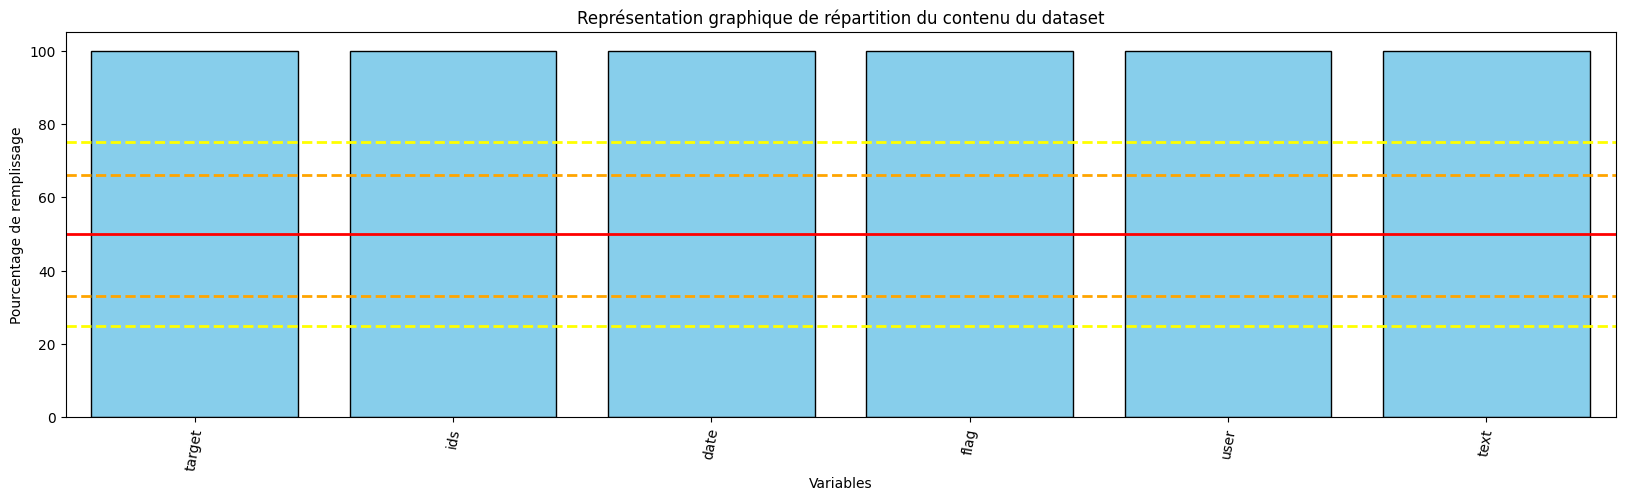

In [ ]:
_visualisationDataset(dataframe, 100, "Yes")

D'emblée, on constate déjà beaucoup de choses :
1. Les variables "ids", "date", "flag", "user" ne nous serviront sans doute pas à grand chose...
2. La base est énorme :  1,6 millions de tweets
3. La variable target semble équilibrée (valeur min=0 / valeur max=4 / moyenne=2 ; Ce qui signifie qu'il y a autant de 0 que de 4 !)
4. La variable "flag" ne sera, pour sûr, d'absolument AUCUNE utilité (1 seule valeur sur l'ensemble du dataset !)

Donc, les variables intéressantes seront :
- "target" (la target à prédire : 0=Tweet négatif / 4=Tweet positif)
- "text" (les données d'entraînement/validation/test)

# Partie 3 : construction de datasets pour l'entrainement/la validation et le test de nos modèles

Entraîner la totalité de nos modèles sur les 1,6 millions de tweets paraît chronophage et pas forcément utile.

On va donc faire un sous-échantillon (équivalent à 5% du dataset de base), de 80 000 tweets.

Ce qui devrait être amplement suffisant pour entrainer/valider et tester nos différents modèles (avant de sélectionner le meilleur modèle et de le tester sur l'entièreté du dataset.

Il sera important toutefois de procéder à un mélange aléatoire (mais reproductible) des données : la target étant négative sur les 50 premiers pourcents du dataset, et positive sur les 50% restants.

In [ ]:
#Sous-échantillonnage de 80 000 individus (5% des 1,6 million de Tweets), stratifié sur la variable "target"
subDataframe_TrainVal, subDataframe_Test = train_test_split(dataframe, train_size=80000, stratify=dataframe["target"], random_state=23011977)

[>100%] Variable : target                                            Remplissage : 100.0 % (80000 individus/80000)	NaN :     0	Type : int64	(Min = 0     Max = 4     Moyenne = 2.0)
[>100%] Variable : ids                                               Remplissage : 100.0 % (80000 individus/80000)	NaN :     0	Type : int64	(Min = 1467811795 Max = 2329205473 Moyenne = 1999450012.97)
[>100%] Variable : date                                              Remplissage : 100.0 % (80000 individus/80000)	NaN :     0	Type : object	(Individus uniques : 75759)
[>100%] Variable : flag                                              Remplissage : 100.0 % (80000 individus/80000)	NaN :     0	Type : object	(Individus uniques : 1)
[>100%] Variable : user                                              Remplissage : 100.0 % (80000 individus/80000)	NaN :     0	Type : object	(Individus uniques : 68063)
[>100%] Variable : text                                              Remplissage : 100.0 % (80000 individus/80000)	Na

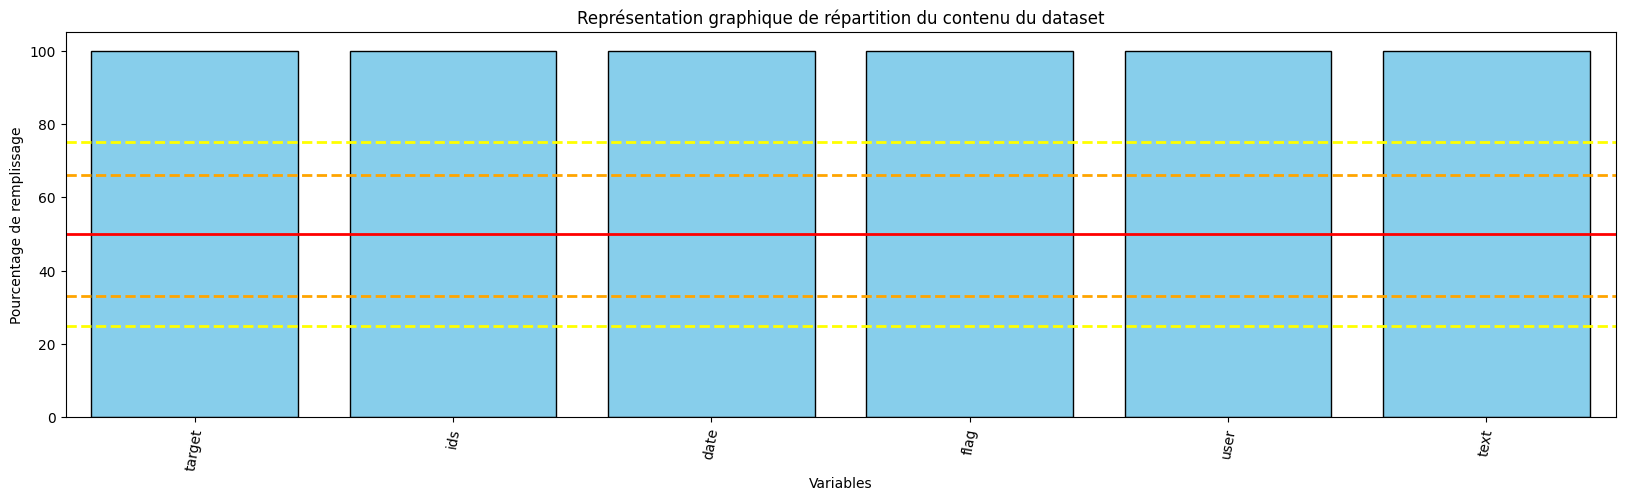

In [ ]:
_visualisationDataset(subDataframe_TrainVal, 100, "Yes")

[>100%] Variable : target                                            Remplissage : 100.0 % (1520000 individus/1520000)	NaN :     0	Type : int64	(Min = 0     Max = 4     Moyenne = 2.0)
[>100%] Variable : ids                                               Remplissage : 100.0 % (1520000 individus/1520000)	NaN :     0	Type : int64	(Min = 1467810369 Max = 2329205794 Moyenne = 1998784264.89)
[>100%] Variable : date                                              Remplissage : 100.0 % (1520000 individus/1520000)	NaN :     0	Type : object	(Individus uniques : 753794)
[>100%] Variable : flag                                              Remplissage : 100.0 % (1520000 individus/1520000)	NaN :     0	Type : object	(Individus uniques : 1)
[>100%] Variable : user                                              Remplissage : 100.0 % (1520000 individus/1520000)	NaN :     0	Type : object	(Individus uniques : 639632)
[>100%] Variable : text                                              Remplissage : 100.0 % (152

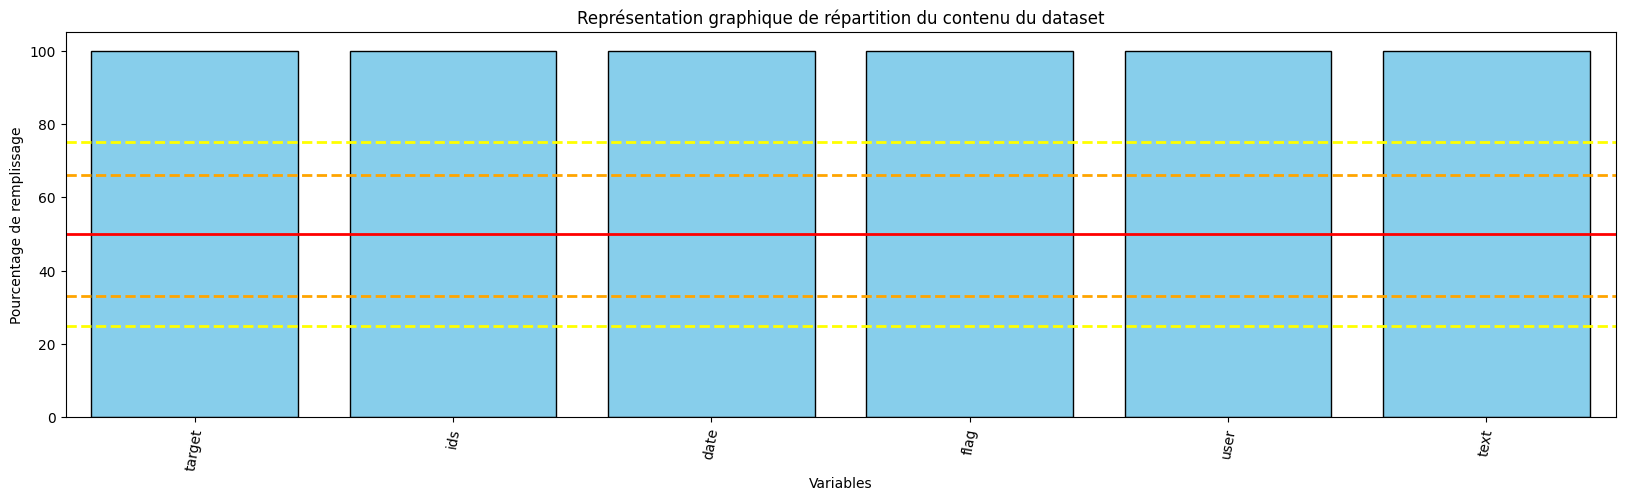

In [ ]:
_visualisationDataset(subDataframe_Test, 100, "Yes")

# Partie 4 : pré-traitement du texte

In [ ]:
#Sur le dataframe d'entraînement et de validation
#On passe le texte dans la fonction de nettoyage/tokensisation/lemmatisation pour le Bag of Words ou l'Embedding
print("\nTraitement textuel : Bag of Words/Embedding + Lemmatisation")
subDataframe_TrainVal["Bag_of_Words_Lemmatise"] = _textCleaning(subDataframe_TrainVal, "text", 0, 0, "english", "Lem") #Pour l'instant, on ne supprime pas les mots de moins de X caractères ou présent plus de X fois (on reviendra adapter si nécessaire)
subDataframe_TrainVal["Bag_of_Words_Lemmatise"] = subDataframe_TrainVal["Bag_of_Words_Lemmatise"].apply(lambda tokens: " ".join(tokens))

#On passe le texte dans la fonction de nettoyage/tokensisation/racinisation pour le Bag of Words ou l'Embedding
print("\nTraitement textuel : Bag of Words/Embedding + Racinisation")
subDataframe_TrainVal["Bag_of_Words_Racinise"] = _textCleaning(subDataframe_TrainVal, "text", 0, 0, "english", "Stem") #Pour l'instant, on ne supprime pas les mots de moins de X caractères ou présent plus de X fois (on reviendra adapter si nécessaire)
subDataframe_TrainVal["Bag_of_Words_Racinise"] = subDataframe_TrainVal["Bag_of_Words_Racinise"].apply(lambda tokens: " ".join(tokens))

#On passe le texte dans la fonction de nettoyage/tokensisation pour le Deep Learning
print("\nTraitement textuel : Deep Learning")
subDataframe_TrainVal["Texte_DeepLearning"] = _textCleaning(subDataframe_TrainVal, "text", 0, 0, "None", "None") #Pour l'instant, on ne supprime pas les mots de moins de X caractères ou présent plus de X fois (on reviendra adapter si nécessaire)
subDataframe_TrainVal["Texte_DeepLearning"] = subDataframe_TrainVal["Texte_DeepLearning"].apply(lambda tokens: " ".join(tokens))


Traitement textuel : Bag of Words/Embedding + Lemmatisation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***Lemmatization***
Nombre total de tokens		: 619597
Nombre de tokens uniques	: 73104

Traitement textuel : Bag of Words/Embedding + Racinisation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***Stemming***
Nombre total de tokens		: 619597
Nombre de tokens uniques	: 66803

Traitement textuel : Deep Learning
Nombre total de tokens		: 1098824
Nombre de tokens uniques	: 76676


In [ ]:
subDataframe_TrainVal

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
711192,0,2258146124,Sat Jun 20 15:27:32 PDT 2009,NO_QUERY,duckiedinkis,mourning the loss of my macbook,mourning loss macbook,mourn loss macbook,mourning the loss of my macbook
805926,4,1468740719,Tue Apr 07 03:28:42 PDT 2009,NO_QUERY,yippeekid,@aplusk i'm not well just wanna say hi!!!!,aplusk well wanna say hi,aplusk well wanna say hi,aplusk i m not well just wanna say hi
914827,4,1752964004,Sat May 09 23:36:48 PDT 2009,NO_QUERY,MCLOVESME,@MariahCarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah
341337,0,2015019394,Wed Jun 03 03:26:59 PDT 2009,NO_QUERY,formulacyan,I can not tell you how sick and tired I am of ...,tell sick tired rain,tell sick tire rain,i can not tell you how sick and tired i am of ...
24165,0,1557919262,Sun Apr 19 06:34:20 PDT 2009,NO_QUERY,davey34j,Hyperextended knee playing basketball... not s...,hyperextended knee playing basketball fun,hyperextend knee play basketbal fun,hyperextended knee playing basketball not so fun
...,...,...,...,...,...,...,...,...,...
1586109,4,2190763170,Tue Jun 16 03:39:32 PDT 2009,NO_QUERY,bwfc_nozza,"can't wait to see take that, @thescript and @g...",wait see take thescript garygomusic next tuesday,wait see take thescript garygomus next tuesday,can t wait to see take that thescript and gary...
1045365,4,1957542567,Fri May 29 00:49:54 PDT 2009,NO_QUERY,regineking,"@NosliwEiggam if i decide to head out after, i...",nosliweiggam decide head definitely give ring,nosliweiggam decid head definit give ring,nosliweiggam if i decide to head out after i l...
470692,0,2176472768,Mon Jun 15 03:58:19 PDT 2009,NO_QUERY,PhilDD531,Goin to class.,goin class,goin class,goin to class
1085759,4,1969209277,Fri May 29 23:20:10 PDT 2009,NO_QUERY,Catohhh,@matrocksteady We are SO in a fight.,matrocksteady fight,matrocksteadi fight,matrocksteady we are so in a fight


In [ ]:
#Sur le dataframe de test
#On passe le texte dans la fonction de nettoyage/tokensisation/lemmatisation pour le Bag of Words ou l'Embedding
print("\nTraitement textuel : Bag of Words/Embedding + Lemmatisation")
subDataframe_Test["Bag_of_Words_Lemmatise"] = _textCleaning(subDataframe_Test, "text", 0, 0, "english", "Lem") #Pour l'instant, on ne supprime pas les mots de moins de X caractères ou présent plus de X fois (on reviendra adapter si nécessaire)
subDataframe_Test["Bag_of_Words_Lemmatise"] = subDataframe_Test["Bag_of_Words_Lemmatise"].apply(lambda tokens: " ".join(tokens))

#On passe le texte dans la fonction de nettoyage/tokensisation/racinisation pour le Bag of Words ou l'Embedding
print("\nTraitement textuel : Bag of Words/Embedding + Racinisation")
subDataframe_Test["Bag_of_Words_Racinise"] = _textCleaning(subDataframe_Test, "text", 0, 0, "english", "Stem") #Pour l'instant, on ne supprime pas les mots de moins de X caractères ou présent plus de X fois (on reviendra adapter si nécessaire)
subDataframe_Test["Bag_of_Words_Racinise"] = subDataframe_Test["Bag_of_Words_Racinise"].apply(lambda tokens: " ".join(tokens))

#On passe le texte dans la fonction de nettoyage/tokensisation pour le Deep Learning
print("\nTraitement textuel : Deep Learning")
subDataframe_Test["Texte_DeepLearning"] = _textCleaning(subDataframe_Test, "text", 0, 0, "None", "None") #Pour l'instant, on ne supprime pas les mots de moins de X caractères ou présent plus de X fois (on reviendra adapter si nécessaire)
subDataframe_Test["Texte_DeepLearning"] = subDataframe_Test["Texte_DeepLearning"].apply(lambda tokens: " ".join(tokens))


Traitement textuel : Bag of Words/Embedding + Lemmatisation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***Lemmatization***
Nombre total de tokens		: 11794992
Nombre de tokens uniques	: 560584

Traitement textuel : Bag of Words/Embedding + Racinisation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***Stemming***
Nombre total de tokens		: 11794992
Nombre de tokens uniques	: 519675

Traitement textuel : Deep Learning
Nombre total de tokens		: 20915506
Nombre de tokens uniques	: 571408


In [ ]:
subDataframe_Test

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
1540668,4,2180525536,Mon Jun 15 10:35:20 PDT 2009,NO_QUERY,TonyMadBony,new August Burns Red song up now!,new august burn red song,new august burn red song,new august burns red song up now
1531842,4,2178122732,Mon Jun 15 07:13:40 PDT 2009,NO_QUERY,CheapInVegas,@smach241 Excellent tip! I've got so many cas...,smach excellent tip got many casino card could...,smach excel tip got mani casino card could dea...,smach excellent tip i ve got so many casino ca...
869338,4,1678111297,Sat May 02 05:32:32 PDT 2009,NO_QUERY,Nemi72,@Morrica I did my cleaning and laundry yesterd...,morrica cleaning laundry yesterday relaxing day,morrica clean laundri yesterday relax day,morrica i did my cleaning and laundry yesterda...
1483587,4,2067490950,Sun Jun 07 12:26:19 PDT 2009,NO_QUERY,CrunchyNits,"@Karinaaaaaaaaaa Well, i live really close to ...",karinaaaaaaaaaa well live really close falkirk x,karinaaaaaaaaaa well live realli close falkirk x,karinaaaaaaaaaa well i live really close to fa...
1464350,4,2064229861,Sun Jun 07 05:38:58 PDT 2009,NO_QUERY,XxXsusan94XxX,The first thing I did when I woke up was drink...,first thing woke drink coca cola neeeded energ...,first thing woke drink coca cola neeed energi xx,the first thing i did when i woke up was drink...
...,...,...,...,...,...,...,...,...,...
401774,0,2057760968,Sat Jun 06 13:36:41 PDT 2009,NO_QUERY,Nathan133,@Clubpenguinfan3 bye - nobody tweeting,clubpenguinfan bye nobody tweeting,clubpenguinfan bye nobodi tweet,clubpenguinfan bye nobody tweeting
1035108,4,1956124980,Thu May 28 21:14:11 PDT 2009,NO_QUERY,MelissaHeckman,"Taken for granted, completely enchanted by you.",taken granted completely enchanted,taken grant complet enchant,taken for granted completely enchanted by you
407215,0,2059119021,Sat Jun 06 16:17:05 PDT 2009,NO_QUERY,LUVNSTYLES,@GsoHandsome I invited u brotha.. U turned me ...,gsohandsome invited u brotha u turned lol naa ...,gsohandsom invit u brotha u turn lol naa find ...,gsohandsome i invited u brotha u turned me dow...
688207,0,2251470986,Sat Jun 20 03:36:42 PDT 2009,NO_QUERY,MonteCarlo311,FUCK I LOST HER,fuck lost,fuck lost,fuck i lost her


In [ ]:
#On va supprimer les individus dont tout le texte aurait été supprimé
#... dans le dataset de train/validation
subDataframe_TrainVal = subDataframe_TrainVal[~subDataframe_TrainVal["Bag_of_Words_Lemmatise"].astype(str).isin(["", "nan", "NaN", "None"])]
subDataframe_TrainVal = subDataframe_TrainVal[~subDataframe_TrainVal["Bag_of_Words_Racinise"].astype(str).isin(["", "nan", "NaN", "None"])]
subDataframe_TrainVal = subDataframe_TrainVal[~subDataframe_TrainVal["Texte_DeepLearning"].astype(str).isin(["", "nan", "NaN", "None"])]
#... ainsi que dans le dataset de test
subDataframe_Test = subDataframe_Test[~subDataframe_Test["Bag_of_Words_Lemmatise"].astype(str).isin(["", "nan", "NaN", "None"])]
subDataframe_Test = subDataframe_Test[~subDataframe_Test["Bag_of_Words_Racinise"].astype(str).isin(["", "nan", "NaN", "None"])]
subDataframe_Test = subDataframe_Test[~subDataframe_Test["Texte_DeepLearning"].astype(str).isin(["", "nan", "NaN", "None"])]

#On va enregistrer nos sous-échantillons en tant que fichiers .CSV,
#afin de pouvoir les recharger pour l'entrainement ou l'inférence de nos modèles,
#sans avoir à repasser par toute la phase de préparation...
subDataframe_TrainVal.to_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_TrainVal.csv", index=False, sep=";")
subDataframe_Test.to_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_Test.csv", index=False, sep=";")

# Partie 5 : création, entraînement et inférence de notre 1er modèle (Régression Logistique) - Pour tests "manuels" avec MLflow

In [4]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_TrainVal.csv", sep=";")
dataframe.shape

Mounted at /content/drive/


(79981, 9)

In [5]:
dataframe

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
0,0,2258146124,Sat Jun 20 15:27:32 PDT 2009,NO_QUERY,duckiedinkis,mourning the loss of my macbook,mourning loss macbook,mourn loss macbook,mourning the loss of my macbook
1,4,1468740719,Tue Apr 07 03:28:42 PDT 2009,NO_QUERY,yippeekid,@aplusk i'm not well just wanna say hi!!!!,aplusk well wanna say hi,aplusk well wanna say hi,aplusk i m not well just wanna say hi
2,4,1752964004,Sat May 09 23:36:48 PDT 2009,NO_QUERY,MCLOVESME,@MariahCarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah
3,0,2015019394,Wed Jun 03 03:26:59 PDT 2009,NO_QUERY,formulacyan,I can not tell you how sick and tired I am of ...,tell sick tired rain,tell sick tire rain,i can not tell you how sick and tired i am of ...
4,0,1557919262,Sun Apr 19 06:34:20 PDT 2009,NO_QUERY,davey34j,Hyperextended knee playing basketball... not s...,hyperextended knee playing basketball fun,hyperextend knee play basketbal fun,hyperextended knee playing basketball not so fun
...,...,...,...,...,...,...,...,...,...
79976,4,2190763170,Tue Jun 16 03:39:32 PDT 2009,NO_QUERY,bwfc_nozza,"can't wait to see take that, @thescript and @g...",wait see take thescript garygomusic next tuesday,wait see take thescript garygomus next tuesday,can t wait to see take that thescript and gary...
79977,4,1957542567,Fri May 29 00:49:54 PDT 2009,NO_QUERY,regineking,"@NosliwEiggam if i decide to head out after, i...",nosliweiggam decide head definitely give ring,nosliweiggam decid head definit give ring,nosliweiggam if i decide to head out after i l...
79978,0,2176472768,Mon Jun 15 03:58:19 PDT 2009,NO_QUERY,PhilDD531,Goin to class.,goin class,goin class,goin to class
79979,4,1969209277,Fri May 29 23:20:10 PDT 2009,NO_QUERY,Catohhh,@matrocksteady We are SO in a fight.,matrocksteady fight,matrocksteadi fight,matrocksteady we are so in a fight


Ok, on a bien récupéré notre sous-échantillon d'environ 80 000 Tweets destinés à l'entrainement et à la validation !

In [17]:
#Regression logistique sur le Bag of Words Lemmatisé - Sauvegardée dans MLflow


#Définition des données X et y
X = dataframe[["Bag_of_Words_Racinise"]]
y = dataframe["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=23011977)

#Vectorisation en Bag of Words
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train["Bag_of_Words_Racinise"])
X_test_vect = vectorizer.transform(X_test["Bag_of_Words_Racinise"])

#Entraînement du modèle
mlflow.set_experiment("Modeles-RegressionLogistique")
mlflow.sklearn.autolog()
with mlflow.start_run(run_name="Regression_Logistique-max_iter_1000-BoW_Racinise"):
    modeleRegressionLogistique = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=23011977)
    modeleRegressionLogistique.fit(X_train_vect, y_train.values)
    #Inférence
    y_pred = modeleRegressionLogistique.predict(X_test_vect)
    y_proba = modeleRegressionLogistique.predict_proba(X_test_vect)[:, 1]

    #Logging manuel des métriques liés aux prédictions sur le dataset de validation
    mlflow.log_metric("validation_accuracy_score", accuracy_score(y_test, y_pred))
    mlflow.log_metric("validation_f1_score", f1_score(y_test, y_pred, pos_label=4))
    mlflow.log_metric("validation_precision_score", precision_score(y_test, y_pred, pos_label=4))
    mlflow.log_metric("validation_recall_score", recall_score(y_test, y_pred, pos_label=4))
    mlflow.log_metric("validation_roc_auc", roc_auc_score(y_test, y_proba))

Accuracy : 0.7490498099619924


Rapport de classification :
              precision    recall  f1-score   support

     Négatif       0.76      0.73      0.74      9998
     Positif       0.74      0.77      0.75      9998

    accuracy                           0.75     19996
   macro avg       0.75      0.75      0.75     19996
weighted avg       0.75      0.75      0.75     19996
 



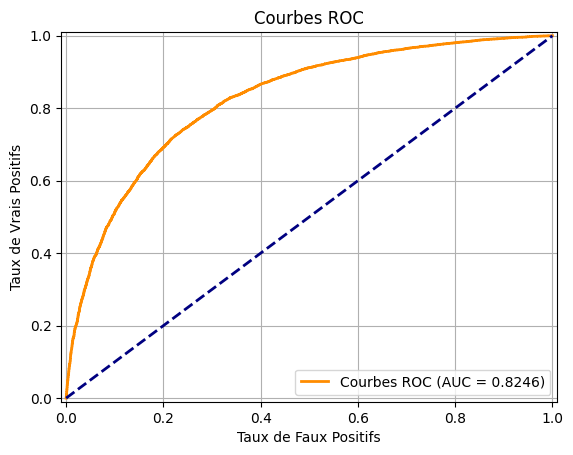

In [19]:
#Métriques
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

#Matrice de confusion
#matriceDeConfusion = confusion_matrix(y_test, y_pred)
#seaborn.heatmap(matriceDeConfusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Négatif", "Positif"], yticklabels=["Négatif", "Positif"])
#matplotlib.pyplot.title("Matrice de confusion")
#matplotlib.pyplot.xlabel("Prédit")
#matplotlib.pyplot.ylabel("Réel")
#matplotlib.pyplot.show()

#Rapport de classification
print("\n\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=["Négatif", "Positif"]), "\n")

#ROC-AUC & AUC
fauxPositifs, vraisPositifs, thresholds = roc_curve(y_test, y_proba, pos_label=4)
roc_auc = auc(fauxPositifs, vraisPositifs)
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(fauxPositifs, vraisPositifs, color="darkorange", lw=2, label=f"Courbes ROC (AUC = {roc_auc:.4f})")
matplotlib.pyplot.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
matplotlib.pyplot.xlim([-0.01, 1.01])
matplotlib.pyplot.ylim([-0.01, 1.01])
matplotlib.pyplot.xlabel("Taux de Faux Positifs")
matplotlib.pyplot.ylabel("Taux de Vrais Positifs")
matplotlib.pyplot.title("Courbes ROC")
matplotlib.pyplot.legend(loc="lower right")
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

Vérifications faites : les métriques sont bien les mêmes que sur MLflow ! Yessss !

Prochaine étape : refaire le modèle de Régression Linéaire, mais cette fois, avec recheche des meilleurs hyper-paramètres et cross-validation, le tout en utilisant notre ami GridSearchCV, bien évidemment !

# Partie 5bis : création, Entraînement et Inférence de notre 1er modèle (Régression Logistique)